# Biased random walks analysis

In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Get transition probability matrices

### Bised random walk

In [173]:
# Get directed graph
G = nx.read_gpickle("../../data/processed/functional_directed_graph_uk.gpickle")

# Create array with edge weight
T = nx.adjacency_matrix(G, weight='edgeWeight').todense()
T_array = np.array(T)

# Transform edge weight into probabilities

# Normalisation 
sum_of_rows = T_array.sum(axis=1)
transition_biased = T_array / sum_of_rows[:, np.newaxis]
transition_biased[transition_biased == 0] = np.nan # replace 0s with nans


<ipython-input-173-99705a4d7a4e>:12: RuntimeWarning: invalid value encountered in true_divide
  transition_biased = T_array / sum_of_rows[:, np.newaxis]


#### Analysis

In [174]:
transition_biased.shape


(13360, 13360)

In [175]:
# Mean of whole matrix
np.nanmean(transition_biased)

0.07525890197191104

In [176]:
# Standard deviation of whole matrix
np.nanstd(transition_biased)

0.1847542902203661

In [196]:
# Mean of rows
row_mean = np.nanmean(transition_biased, axis=1)
row_mean

<ipython-input-196-78744aecfea8>:2: RuntimeWarning: Mean of empty slice
  row_mean = np.nanmean(transition_biased, axis=1)


array([6.32911392e-04, 1.19047619e-03, 7.45156483e-04, ...,
                  nan,            nan, 1.00000000e+00])

In [197]:
# Mean of mean of rows
np.nanmean(row_mean)

0.49000957023456915

In [198]:
# Standard deviation of rows 
row_std = np.nanstd(transition_biased, axis=1)
row_std

/usr/local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


array([0.0117844 , 0.01507431, 0.00872097, ...,        nan,        nan,
       0.        ])

In [199]:
# Mean standard deviation of rows 
np.nanmean(row_std)

0.037582648090343805

In [200]:
# Mean of cols
col_mean = np.nanmean(transition_biased, axis=0)

# Mean of mean of cols
np.nanmean(col_mean)

<ipython-input-200-3d2da4eff42a>:2: RuntimeWarning: Mean of empty slice
  col_mean = np.nanmean(transition_biased, axis=0)


0.17375166343371778

In [201]:
# Standard deviation of cols 
col_std = np.nanstd(transition_biased, axis=0)
col_std

array([0.25590996, 0.0840136 , 0.16526446, ..., 0.        , 0.        ,
              nan])

In [202]:
# Mean standard deviation of rows 
np.nanmean(col_std)

0.08390663919439968

In [203]:
# Distribution of the standard deviation (rows)
transition_biased_df = pd.DataFrame(row_std)
transition_biased_df.describe()

,0
count,12732.000000
mean,0.037583
std,0.056945
min,0.000000
25%,0.000000
50%,0.000000
75%,0.064162
max,0.388889


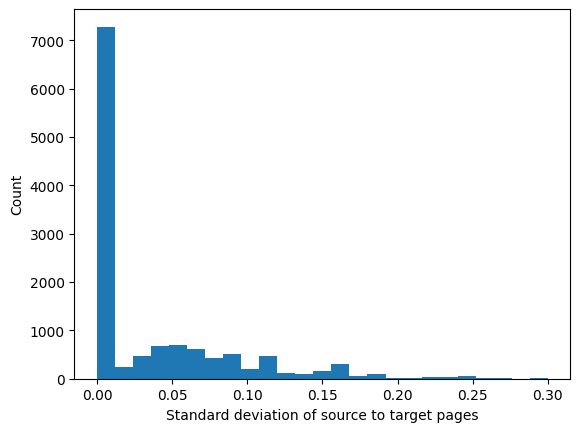

In [205]:
# Distribution of the standard deviation (rows)
plt.hist(row_std, range=(0,0.3), bins=25) 
plt.xlabel('Standard deviation of source to target pages')
plt.ylabel('Count')
# plt.title('')
plt.show()

In [212]:
row_std

array([0.0117844 , 0.01507431, 0.00872097, ...,        nan,        nan,
       0.        ])

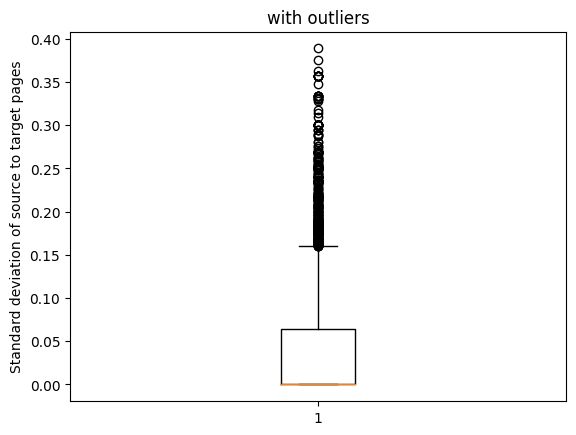

In [215]:
# boxplot 
filtered_data = row_std[~np.isnan(row_std)]
plt.boxplot(filtered_data)
plt.ylabel('Standard deviation of source to target pages')
plt.title('with outliers')
plt.show()

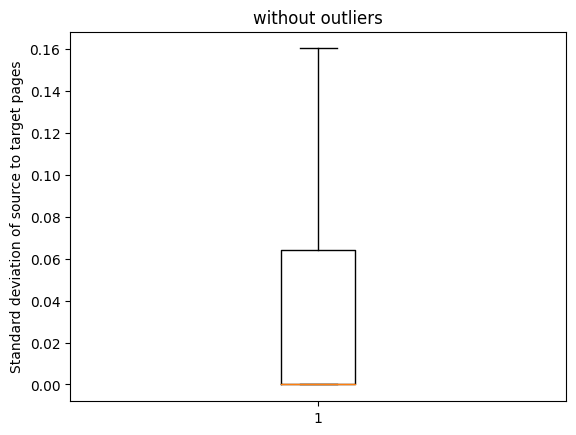

In [216]:
# boxplot without outliers
plt.boxplot(filtered_data, showfliers=False)
plt.ylabel('Standard deviation of source to target pages')
plt.title('without outliers')
plt.show()

### Unbiased random walk


In [ ]:
# convert nans to 0 
transition_biased_to_zero = np.nan_to_num(transition_biased)

# count the number of non-zero elements in each row
transition_biased_len = np.count_nonzero(transition_biased_to_zero, axis=1)

In [ ]:
# list of length
transition_biased_len_list = transition_biased_len.tolist()

In [ ]:
lengths = []
for length in transition_biased_len_list:
    if length != 0:
        lengths.append(1/length)

#### Analysis

In [ ]:
# Subtract matrices from one another and find the mean
subtracted = transition_biased - transition_naive
np.nanmean(subtracted)

In [ ]:
# Subtract matrices from one another and find the std
np.nanstd(subtracted)

In [ ]:
# Subtract matrices from one another and find the std of rows
std_row = np.nanstd(subtracted, axis=0)
np.nanmean(std_row)

In [ ]:
# Subtract matrices from one another and find the std of cols
std_col = np.nanstd(subtracted, axis=1)
np.nanmean(std_col)

In [ ]:
# Two sample t-test between matrices
stats = stats.ttest_ind(a=transition_biased, b=transition_naive, nan_policy = 'omit', equal_var=False)

In [ ]:
# Compute variance
np.nanvar(transition_biased), np.nanvar(transition_naive)

## Get outputs


In [ ]:
output_naive = pd.read_csv('../../outputs/pages_ranked_with_data.csv')  
output_biased = pd.read_csv('../../outputs/pages_ranked_directed_uk.csv')  

In [ ]:
# Page paths 
pages_naive = list(output_naive['page path'])
pages_biased = list(output_biased['page path'])

In [ ]:
# Pages in the naive approach that are not in the biased approach 
[node for node in pages_naive if node not in pages_biased]
len([node for node in pages_naive if node not in pages_biased])

In [ ]:
# Pages in the biased approach that are not in the naive approach 
len([node for node in pages_biased if node not in pages_naive])

In [ ]:
# Top 100 pages in the naive approach that are not in the biased approach 
[node for node in pages_naive[:100] if node not in pages_biased[:100]]

## Pages with the largest bias

In [188]:
# Get a list of the nodes
list_of_nodes = list(G.nodes())

# Get a list of the std dev (source pages)
list_of_row_stds = list(row_std)

# Get a list of the std dev (destination pages)
list_of_cols_stds = list(col_std)

# Create dict of node and std
dict_of_nodes_std = dict(zip(list_of_nodes, list_of_row_stds))

In [189]:
# Source pages with the largest bias
sorted({key:value for (key, value) in dict_of_nodes_std.items()}.items(), key=lambda x:x[1], reverse=True)

[('/costau-galwadau', 0.38888888888888884),
 ('/guidance/updating-your-personal-details', 0.375),
 ('/guidance/brexit-guidance-for-individuals-and-families.cy',
  0.3626188621469474),
 ('/government/publications/sponsorship-sporting-code-of-practice',
  0.3571428571428571),
 ('/government/publications/oisc-campaigns-posters-foreign-languages',
  0.3571428571428571),
 ('/foreign-travel-advice/guyana/return-to-the-uk', 0.3571428571428571),
 ('/world/travelling-to-thailand', 0.3571428571428571),
 ('/guidance/notarial-and-documentary-services-guide-for-turkey',
  0.3571428571428571),
 ('/government/publications/send-evidence-for-your-global-talent-extension-or-settlement-application',
  0.3571428571428571),
 ('/government/publications/guidance-for-euss-advisers', 0.3571428571428571),
 ('/world/luxembourg', 0.3571428571428571),
 ('/brexit.cy', 0.34745186562096764),
 ('/government/publications/tuberculosis-test-for-a-uk-visa-clinics-in-democratic-republic-of-congo',
  0.33333333333333337),
 

In [217]:
# Source pages with the smallest bias
sorted({key:value for (key, value) in dict_of_nodes_std.items()}.items(), key=lambda x:x[1], reverse=False)

[('/government/publications/points-based-system-evidential-flexibility', 0.0),
 ('/government/publications/tuberculosis-test-for-a-uk-visa-clinics-in-mozambique/tuberculosis-testing-in-mozambique',
  0.0),
 ('/government/publications/coronavirus-covid-19-safer-transport-guidance-for-operators/coronavirus-covid-19-safer-transport-guidance-for-operators',
  0.0),
 ('/government/publications/tuberculosis-test-for-a-uk-visa-clinics-in-bolivia',
  0.0),
 ('/government/publications/belgium-consular-fees/belgium-consular-fees', 0.0),
 ('/government/publications/send-evidence-for-your-global-talent-extension-or-settlement-application/send-evidence-for-your-global-talent-extension-or-settlement-application',
  0.0),
 ('/government/publications/tuberculosis-test-for-a-uk-visa-clinics-in-bolivia/tuberculosis-testing-in-bolivia',
  0.0),
 ('/guidance/frontier-workers-apply-for-a-review-of-your-frontier-worker-permit-decision',
  0.0),
 ('/government/publications/memorandum-of-understanding-between

In [193]:
7/8

0.875

In [194]:
1/8

0.125

In [148]:
1/15


0.06666666666666667

In [195]:
np.std([0.875, 0.125])

0.375

In [44]:
{key:value for (key, value) in dict_of_nodes_std.items() 
  if key == '/guidance/travel-to-england-from-another-country-during-coronavirus-covid-19'}

{'/guidance/travel-to-england-from-another-country-during-coronavirus-covid-19': 0.015074313480004018}